# Homework 02 --- Session 3, Multilinear regression

In [77]:
import numpy as np   # basic numeric module in python, for array and matrix computation
import pandas as pd  # advanced numeric module, excels in data frame analysis
import matplotlib.pyplot as plt  # for data visualization
%pylab inline
# so the plots are embedded in notebook rather than a stand alone window

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

Populating the interactive namespace from numpy and matplotlib


## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [78]:
#import the data as ex1
ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)

In [79]:
#look at the data 
ex1.head()

,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


#####Part a: x1 serves as the dummy variable corresponding to the intercept term since all values of x1 are 1. 

#####Part b

In [80]:
X = np.matrix(ex1.loc[:,['x1','x2','x3']])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print "the coefficient matrix is", w

the coefficient matrix is [[ 2. ]
 [ 0.7]
 [-0.5]]


#####Part c

In [81]:
lm1 = smf.ols(formula = 'y ~ x2 + x3', data = ex1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.983333
Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


#####Part d

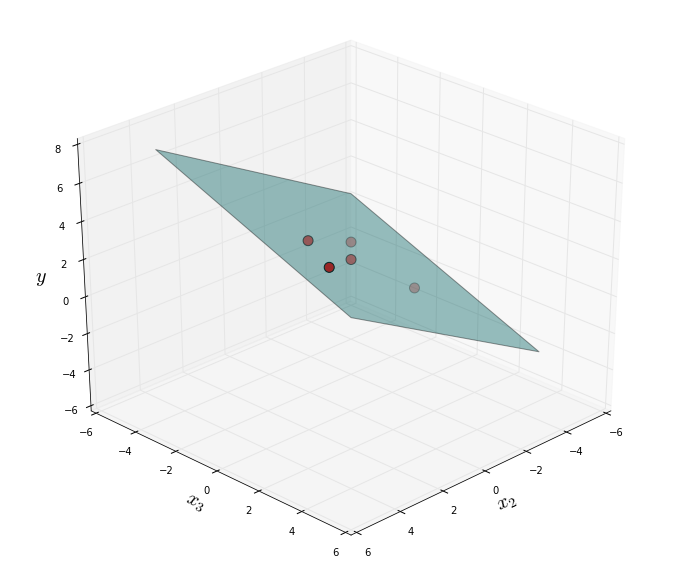

In [82]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(ex1.x2, ex1.x3, ex1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x2, x3 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x2 + lm1.params[2] * x3

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x2, x3, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_2$', fontsize = 20)
ax.set_ylabel('$x_3$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 45)   # Controls the viewing angle

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Total population (for each zip code)
* Population with No Insurance coverage
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with NO Insurance coverage
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with BOTH types of Insurance coverage
* (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

Part A Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information

In [76]:
ex2 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv')

In [40]:
ex2.head() #view the data structure

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothCoverage
0,10001,77512,22767,1958,20809,5800,16795,1786
1,10002,26905,79490,9129,70361,40139,35167,4945
2,10003,79088,56909,3774,53135,8593,48522,3980
3,10004,98020,3024,244,2780,180,2705,105
4,10005,99633,7566,570,6996,122,6944,70


In [83]:
# If two things are equal, then Boolean operation (a == b) would return 
# True which can be intepreted as integer 1 in Python, thus if the product 
# is 1 then all entries must be 1 (one False would cause the multiplication
# to yield 0).  In this case, if the product = 0 then public + private is
# greater than total with coverage, so some people must have both

prod(ex2.Public + ex2.Private == ex2.WithCoverage)

0

In [87]:
ex2['Coverage'] = ex2.Public + ex2.Private != ex2.WithCoverage

In [88]:
#Make a new column to store the number of people with both coverages
#This will be the number with public + the number with private - the number
#of people covered
ex2['BothCoverage'] = ex2.Public + ex2.Private - ex2.WithCoverage

In [89]:
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,Coverage,BothCoverage
0,10001,77512,22767,1958,20809,5800,16795,True,1786
1,10002,26905,79490,9129,70361,40139,35167,True,4945
2,10003,79088,56909,3774,53135,8593,48522,True,3980
3,10004,98020,3024,244,2780,180,2705,True,105
4,10005,99633,7566,570,6996,122,6944,True,70


Part B Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
IncomePerCapita
Total Population
Population with NO Insurance coverage
Population with Public Insurance coverage ONLY
Population with Private Insurance coverage ONLY
Population with BOTH types of Insurance coverage

In [54]:
#modify the dataframe to add columns with public coverage only (pub_only)
#and private coverage only (priv_only)
ex2['pub_only'] = ex2.Public - ex2.BothCoverage
ex2['priv_only'] = ex2.Private - ex2.BothCoverage
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothCoverage,pub_only,priv_only
0,10001,77512,22767,1958,20809,5800,16795,1786,4014,15009
1,10002,26905,79490,9129,70361,40139,35167,4945,35194,30222
2,10003,79088,56909,3774,53135,8593,48522,3980,4613,44542
3,10004,98020,3024,244,2780,180,2705,105,75,2600
4,10005,99633,7566,570,6996,122,6944,70,52,6874


In [58]:
#Check that the sum of the both coverage, privonly and pubonly is the total covered
prod(ex2.BothCoverage + ex2.priv_only + ex2.pub_only == ex2.WithCoverage)

1

Part C Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)

In [57]:
#drop the parts with NaN(if any) 
ex2.dropna(inplace = True)

In [71]:
#convert all population number into proportion 
#(percentage, with the form 58.3 instead of 0.583)
data2 = pd.concat([ex2.Zipcode, ex2.IncomePerCapita, ex2.TotalPop,  
        100*ex2.iloc[:,3:].div(ex2.TotalPop, axis = 0)],  # Compute the percentage, column-wise
        axis = 1)
data2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothCoverage,pub_only,priv_only
0,10001,77512,22767,8.600167,91.399833,25.475469,73.769052,7.844687,17.630781,65.924364
1,10002,26905,79490,11.484463,88.515537,50.495660,44.240785,6.220908,44.274752,38.019877
2,10003,79088,56909,6.631640,93.368360,15.099545,85.262437,6.993621,8.105923,78.268815
3,10004,98020,3024,8.068783,91.931217,5.952381,89.451058,3.472222,2.480159,85.978836
4,10005,99633,7566,7.533703,92.466297,1.612477,91.779011,0.925192,0.687285,90.853820


Part D Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.

In [72]:
lm2 = smf.ols(formula = 'IncomePerCapita ~ pub_only + priv_only + BothCoverage', data = data2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Wed, 28 Sep 2016   Prob (F-statistic):           3.25e-37
Time:                        13:58:53   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept    -6.303e+04   2.76e+04     -2.280   

In [73]:
print('R2 = %f'%lm2.rsquared)
print(lm2.params)

R2 = 0.622215
Intercept      -63030.644620
pub_only          385.776670
priv_only        1621.503140
BothCoverage      911.096431
dtype: float64


Private insurance (and both insurance) are a stronger indicator of income than public insurance.  This implies that the more people in a zip code have private insurance or both insurances, the higher the income per capita is.  The intercept is negative in this case, implying that if no one in the zipcode has insurance, the income is a negative number (the people in the zipcode cost money or need government assistance). 

(e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

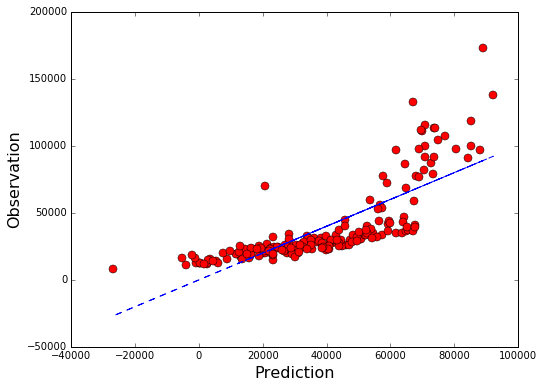

In [74]:
#Plot the data
y_fit = lm2.predict(data2)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(y_fit,data2.IncomePerCapita,'or', markersize = 8) # Plot the observed value, linestyle = 'or', red dots
plt.plot(y_fit,y_fit,'--b', linewidth = 1)                 # Plot the predicted value, blue dashed line

# Plot setting
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)

In [75]:
#Check Correlation Matrix
data2.corr()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,BothCoverage,pub_only,priv_only
Zipcode,1.000000,-0.490675,0.115875,0.334912,-0.334912,0.232870,-0.279087,0.032335,0.219494,-0.299357
IncomePerCapita,-0.490675,1.000000,-0.374920,-0.602753,0.602753,-0.713251,0.779469,0.101578,-0.746417,0.778040
TotalPop,0.115875,-0.374920,1.000000,0.381392,-0.381392,0.379426,-0.470548,-0.179863,0.443568,-0.433830
NoCoverage,0.334912,-0.602753,0.381392,1.000000,-1.000000,0.431746,-0.755231,-0.344447,0.556389,-0.679430
WithCoverage,-0.334912,0.602753,-0.381392,-1.000000,1.000000,-0.431746,0.755231,0.344447,-0.556389,0.679430
Public,0.232870,-0.713251,0.379426,0.431746,-0.431746,1.000000,-0.871228,0.169275,0.931315,-0.955171
Private,-0.279087,0.779469,-0.470548,-0.755231,0.755231,-0.871228,1.000000,0.267759,-0.964837,0.956594
BothCoverage,0.032335,0.101578,-0.179863,-0.344447,0.344447,0.169275,0.267759,1.000000,-0.201309,-0.024644
pub_only,0.219494,-0.746417,0.443568,0.556389,-0.556389,0.931315,-0.964837,-0.201309,1.000000,-0.940209
priv_only,-0.299357,0.778040,-0.433830,-0.679430,0.679430,-0.955171,0.956594,-0.024644,-0.940209,1.000000


Based on the results of the regression and the above plot, it looks like there might actually be two different regressions required.  One for Income Per Capita is less than $50,000 and one for Income Per Capita above $50,000.  Because the regression is attempting to account for both parts of this data, the regression is missing the trended predictions.  

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four(4) subfigures, then in each subfigure:
    * (e.1) Draw the scatter plot
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick a x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?